In [115]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
from ipywidgets import widgets
import warnings
warnings.filterwarnings('ignore')

In [116]:
df1 = pd.read_csv("training_set_rel3.tsv", delimiter="\t", encoding="latin-1")

In [117]:
df1

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12971,21626,8,In most stories mothers and daughters are eit...,17,18,NaN,35,NaN,NaN,NaN,...,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12972,21628,8,I never understood the meaning laughter is th...,15,17,NaN,32,NaN,NaN,NaN,...,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12973,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",20,26,40.0,40,NaN,NaN,NaN,...,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0
12974,21630,8,Trippin' on fen...,20,20,NaN,40,NaN,NaN,NaN,...,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


## Exploratory data analysis 

In [118]:
df1.columns

Index(['essay_id', 'essay_set', 'essay', 'rater1_domain1', 'rater2_domain1',
       'rater3_domain1', 'domain1_score', 'rater1_domain2', 'rater2_domain2',
       'domain2_score', 'rater1_trait1', 'rater1_trait2', 'rater1_trait3',
       'rater1_trait4', 'rater1_trait5', 'rater1_trait6', 'rater2_trait1',
       'rater2_trait2', 'rater2_trait3', 'rater2_trait4', 'rater2_trait5',
       'rater2_trait6', 'rater3_trait1', 'rater3_trait2', 'rater3_trait3',
       'rater3_trait4', 'rater3_trait5', 'rater3_trait6'],
      dtype='object')

In [119]:
df = df1[['essay_id', 'essay_set', 'essay', 'domain1_score', 'domain2_score']]

In [120]:
df

,essay_id,essay_set,essay,domain1_score,domain2_score
0,1,1,"Dear local newspaper, I think effects computer...",8,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",8,NaN
...,...,...,...,...,...
12971,21626,8,In most stories mothers and daughters are eit...,35,NaN
12972,21628,8,I never understood the meaning laughter is th...,32,NaN
12973,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",40,NaN
12974,21630,8,Trippin' on fen...,40,NaN


In [121]:
df.head()

,essay_id,essay_set,essay,domain1_score,domain2_score
0,1,1,"Dear local newspaper, I think effects computer...",8,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",8,NaN


In [122]:
df.tail()

,essay_id,essay_set,essay,domain1_score,domain2_score
12971,21626,8,In most stories mothers and daughters are eit...,35,NaN
12972,21628,8,I never understood the meaning laughter is th...,32,NaN
12973,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",40,NaN
12974,21630,8,Trippin' on fen...,40,NaN
12975,21633,8,Many people believe that laughter can improve...,40,NaN


In [123]:
# There are 8 set
df['essay_set'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [124]:
# copy our dataFrame with df_modified

df_modified = df.copy()

In [125]:
# Filtering and multiplying set 2(domain2_score ) by 1.5 

df_modified.loc[df_modified['essay_set'] == 2, 'domain2_score'] *= 1.5

In [126]:
# Result after filtering, multiplying and adding the other columns

df_interm1 = df_modified[['essay_id', 'essay_set', 'essay', 'domain1_score', 'domain2_score', ]]

In [127]:
df_interm1

,essay_id,essay_set,essay,domain1_score,domain2_score
0,1,1,"Dear local newspaper, I think effects computer...",8,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",8,NaN
...,...,...,...,...,...
12971,21626,8,In most stories mothers and daughters are eit...,35,NaN
12972,21628,8,I never understood the meaning laughter is th...,32,NaN
12973,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",40,NaN
12974,21630,8,Trippin' on fen...,40,NaN


In [128]:
# To check that the operation has worked, you will need to run the code below.

##print(df_modified[df_modified['essay_set'] == 2][['essay_id', 'essay_set', 'essay', 'domain2_score']])

In [129]:
df_interm2= df_interm1[['domain1_score', 'domain2_score']]

In [130]:
df_interm2

,domain1_score,domain2_score
0,8,NaN
1,9,NaN
2,7,NaN
3,10,NaN
4,8,NaN
...,...,...
12971,35,NaN
12972,32,NaN
12973,40,NaN
12974,40,NaN


#### Normalization of data

In [131]:
# Normalising columns

df_normalized = (df_interm2 - df_interm2.min()) / (df_interm2.max() - df_interm2.min())

In [132]:
## Calculate the average, ignoring np.nan

average_without_nan = df_normalized.mean(axis=1, skipna=True)

In [133]:
# Add the average to our original DataFrame

df_normalized['average'] = average_without_nan

In [134]:
# DataFrame resulting after normalisation and calculation of averages
df_normalized

,domain1_score,domain2_score,average
0,0.133333,NaN,0.133333
1,0.150000,NaN,0.150000
2,0.116667,NaN,0.116667
3,0.166667,NaN,0.166667
4,0.133333,NaN,0.133333
...,...,...,...
12971,0.583333,NaN,0.583333
12972,0.533333,NaN,0.533333
12973,0.666667,NaN,0.666667
12974,0.666667,NaN,0.666667


In [135]:
# the average calculated from the other columns, this is the column we are interested 

df_normalized["average"]

0        0.133333
1        0.150000
2        0.116667
3        0.166667
4        0.133333
           ...   
12971    0.583333
12972    0.533333
12973    0.666667
12974    0.666667
12975    0.666667
Name: average, Length: 12976, dtype: float64

### feature engineering

In [136]:
# Catégoriser la colonne 'average' en médiocre, moyen et excellent

df_normalized['category'] = pd.cut(df_normalized['average'], bins=[-float('inf'), 0.33, 0.66, float('inf')], labels=['médiocre', 'moyen', 'excellent'])
df_normalized

,domain1_score,domain2_score,average,category
0,0.133333,NaN,0.133333,médiocre
1,0.150000,NaN,0.150000,médiocre
2,0.116667,NaN,0.116667,médiocre
3,0.166667,NaN,0.166667,médiocre
4,0.133333,NaN,0.133333,médiocre
...,...,...,...,...
12971,0.583333,NaN,0.583333,moyen
12972,0.533333,NaN,0.533333,moyen
12973,0.666667,NaN,0.666667,excellent
12974,0.666667,NaN,0.666667,excellent


In [137]:
#la catégorisation
df_normalized['category'].value_counts()

category
médiocre     10297
moyen         2372
excellent      307
Name: count, dtype: int64

### Merge the cetgory column with the other columns

In [138]:
df_final = df1[['essay_id', 'essay_set', 'essay']]
df_final

,essay_id,essay_set,essay
0,1,1,"Dear local newspaper, I think effects computer..."
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu..."
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl..."
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that..."
4,5,1,"Dear @LOCATION1, I know having computers has a..."
...,...,...,...
12971,21626,8,In most stories mothers and daughters are eit...
12972,21628,8,I never understood the meaning laughter is th...
12973,21629,8,"When you laugh, is @CAPS5 out of habit, or is ..."
12974,21630,8,Trippin' on fen...


In [139]:
df_final['category'] = df_normalized['category']

In [140]:
df_final

,essay_id,essay_set,essay,category
0,1,1,"Dear local newspaper, I think effects computer...",médiocre
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",médiocre
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",médiocre
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",médiocre
4,5,1,"Dear @LOCATION1, I know having computers has a...",médiocre
...,...,...,...,...
12971,21626,8,In most stories mothers and daughters are eit...,moyen
12972,21628,8,I never understood the meaning laughter is th...,moyen
12973,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",excellent
12974,21630,8,Trippin' on fen...,excellent


In [141]:
df_final.head(20)

,essay_id,essay_set,essay,category
0,1,1,"Dear local newspaper, I think effects computer...",médiocre
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",médiocre
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",médiocre
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",médiocre
4,5,1,"Dear @LOCATION1, I know having computers has a...",médiocre
5,6,1,"Dear @LOCATION1, I think that computers have a...",médiocre
6,7,1,Did you know that more and more people these d...,médiocre
7,8,1,@PERCENT1 of people agree that computers make ...,médiocre
8,9,1,"Dear reader, @ORGANIZATION1 has had a dramatic...",médiocre
9,10,1,In the @LOCATION1 we have the technology of a ...,médiocre


In [142]:
df_final.tail(20)

,essay_id,essay_set,essay,category
12956,21606,8,"One time I was at my friend @PERSON1's house, ...",moyen
12957,21607,8,LAUGHTER @CAPS1 knows that laughter is a heal...,excellent
12958,21608,8,One thing that people in the world love to do ...,excellent
12959,21609,8,"Laughter, to me, is an important aspect of my...",excellent
12960,21610,8,People always say that the worst parts of lif...,excellent
12961,21611,8,Why is it that people can look back at someth...,excellent
12962,21613,8,"Before my best friend moved away, we would st...",excellent
12963,21615,8,@ORGANIZATION1 ...,moyen
12964,21617,8,"Morose and somnolent, I woke up. I woke up to...",moyen
12965,21618,8,A while back my mom had decided to send me to...,excellent


In [143]:
# The columns that are essential in our data, at this time is categorical
# We see that in these columns, there are no missing values

df_final.isna().sum()

essay_id     0
essay_set    0
essay        0
category     0
dtype: int64

In [144]:
df_final['essay_set'].value_counts()

essay_set
5    1805
2    1800
6    1800
1    1783
4    1770
3    1726
7    1569
8     723
Name: count, dtype: int64

### Descriptive statistics

In [145]:
df_final.describe()

,essay_id,essay_set
count,12976.000000,12976.000000
mean,10295.395808,4.179485
std,6309.074105,2.136913
min,1.000000,1.000000
25%,4438.750000,2.000000
50%,10044.500000,4.000000
75%,15681.250000,6.000000
max,21633.000000,8.000000


In [146]:
df_final.groupby(by=["essay_set","category"]).count()

essay_id  essay
essay_set category                  
1         médiocre       1783   1783
          moyen             0      0
          excellent         0      0
2         médiocre        220    220
          moyen          1580   1580
          excellent         0      0
3         médiocre       1726   1726
          moyen             0      0
          excellent         0      0
4         médiocre       1770   1770
          moyen             0      0
          excellent         0      0
5         médiocre       1805   1805
          moyen             0      0
          excellent         0      0
6         médiocre       1800   1800
          moyen             0      0
          excellent         0      0
7         médiocre       1191   1191
          moyen           378    378
          excellent         0      0
8         médiocre          2      2
          moyen           414    414
          excellent       307    307

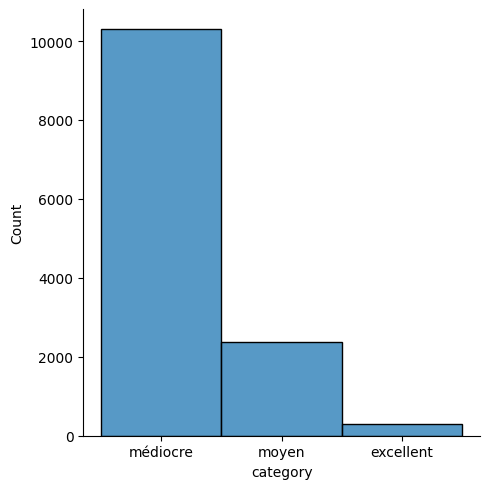

In [147]:
sns.displot(data=df_final,x="category")  

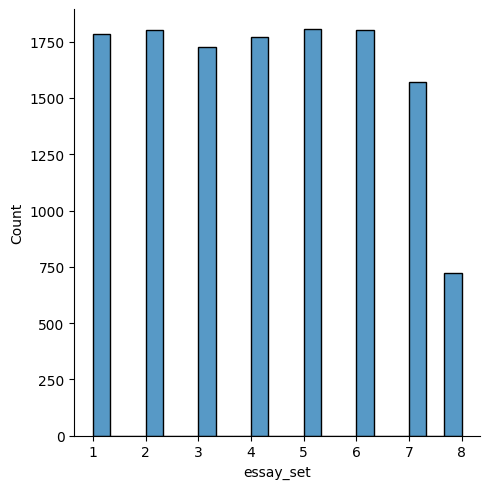

In [148]:
sns.displot(data=df_final,x="essay_set")